1. Dựa vào dữ liệu sau, hiển thị tọa độ của theo lat và lon của các nước lên một bản đồ
2. Phân cụm theo 3 thuật toán K-Means, DBSCAN, và DPC
3. So sánh kết quả và nhận xét

# Library

In [327]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN, KMeans
from dpca import DensityPeakCluster
from sklearn import metrics


In [328]:
data = pd.read_csv("./file_csv/countries.csv")
display(data)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


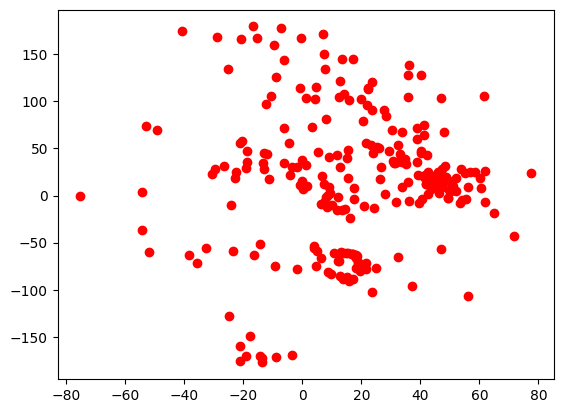

In [329]:
plt.scatter(data['latitude'], data['longitude'], c='red')
plt.show()

# EX1: Dựa vào dữ liệu sau, hiển thị tọa độ của theo lat và lon của các nước lên một bản đồ

In [330]:
import os, googlemaps
from pymaps.pymaps import Map
lat, lon = 8.619543, 0.824782


In [331]:
data = pd.read_csv('./file_csv/countries.csv')
print(data)

    country   latitude  longitude                  name
0        AD  42.546245   1.601554               Andorra
1        AE  23.424076  53.847818  United Arab Emirates
2        AF  33.939110  67.709953           Afghanistan
3        AG  17.060816 -61.796428   Antigua and Barbuda
4        AI  18.220554 -63.068615              Anguilla
..      ...        ...        ...                   ...
240      YE  15.552727  48.516388                 Yemen
241      YT -12.827500  45.166244               Mayotte
242      ZA -30.559482  22.937506          South Africa
243      ZM -13.133897  27.849332                Zambia
244      ZW -19.015438  29.154857              Zimbabwe

[245 rows x 4 columns]


In [332]:

# import gmplot package
import gmplot
  
latitude_list = df['latitude']
longitude_list = df['longitude']
  
gmap3 = gmplot.GoogleMapPlotter(30.3164945, 78.03219179999999, 13)
  
# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, '#FF0000', size = 10000, marker = False )

gmap3.draw( "map.html" )

<img src="./utils/map1.png"/>

# EX2: Phân cụm theo 3 thuật toán K-Means, DBSCAN, và DPC

In [333]:
data.isna().sum()

country      1
latitude     1
longitude    1
name         0
dtype: int64

In [334]:
def rnd(df):
    # round 
    df.fillna(round(df.mean()), inplace=True)

In [335]:
rnd(data['latitude'])
rnd(data['longitude'])

### kmeans

In [356]:
kmeans = KMeans(n_clusters = 5)
y_pred = kmeans.fit_predict(data.iloc[:,[1,2]])

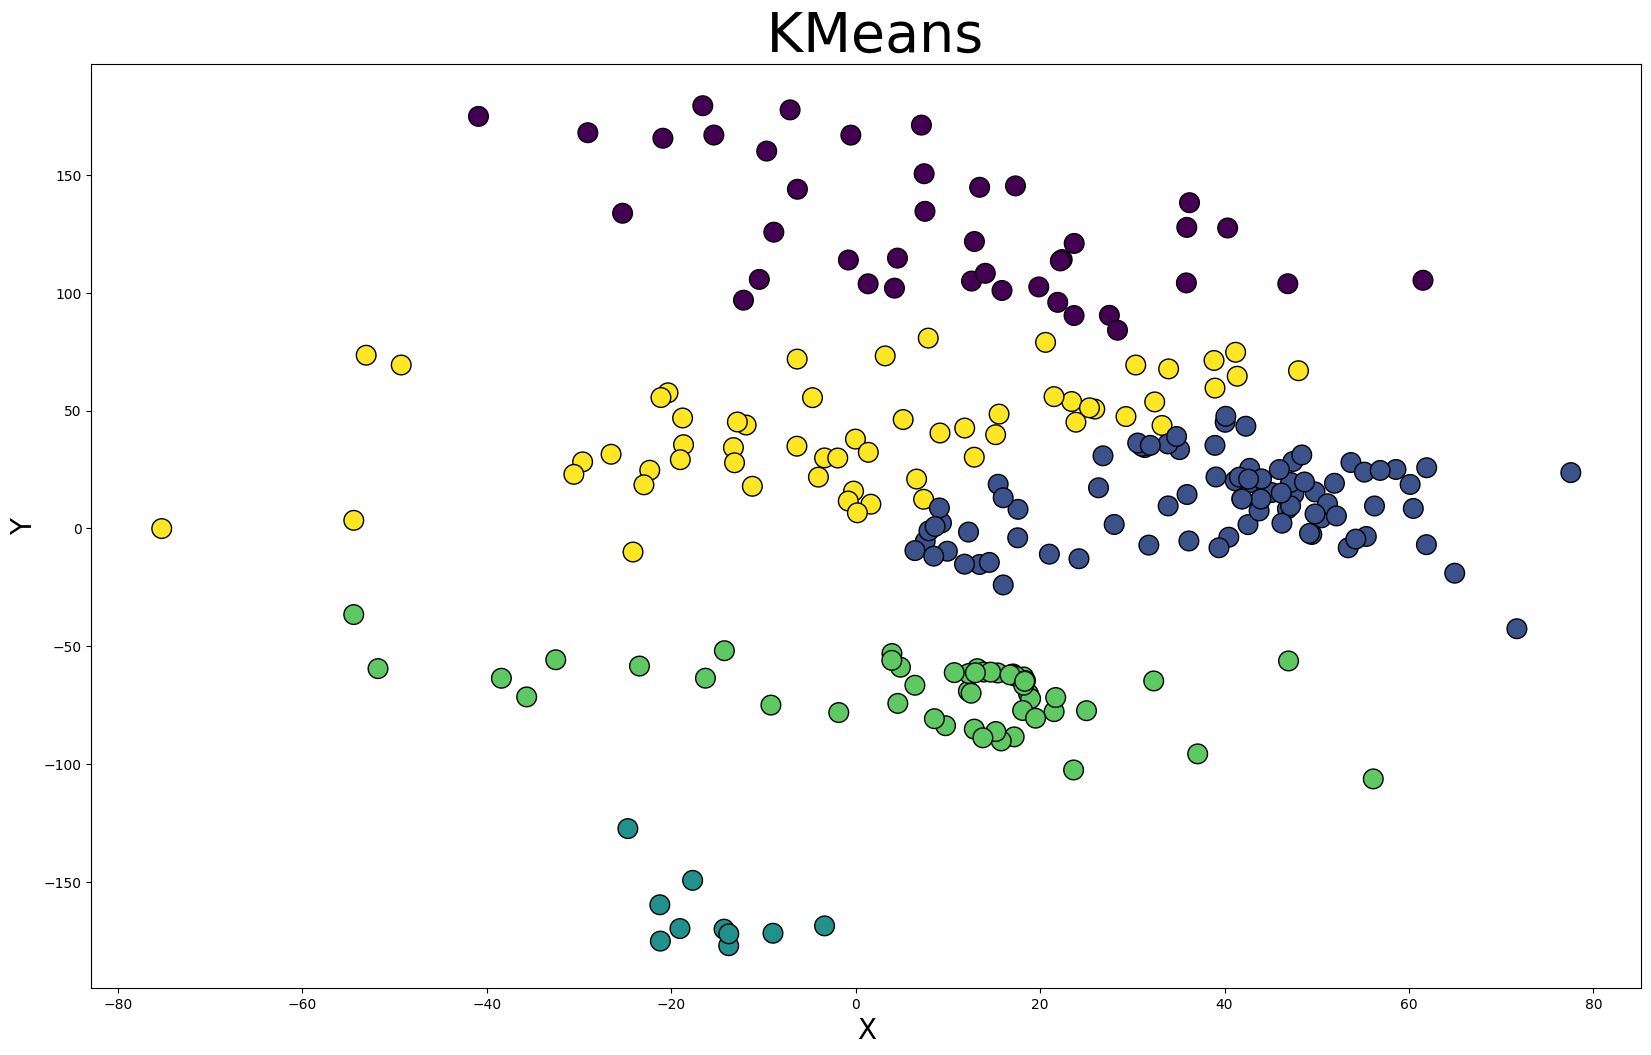

In [357]:
# Show kết quả phân cụm
plt.figure(figsize=(20,12))
plt.scatter(
    data['latitude'], data['longitude'],
    c=y_pred, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title(" KMeans", fontsize=40)
plt.show()

### DBSCAN

In [358]:
db = DBSCAN(eps=10, min_samples=5).fit(data.iloc[:, [1, 2]])
y_pred_DB = db.fit_predict(data.iloc[:, [1, 2]])

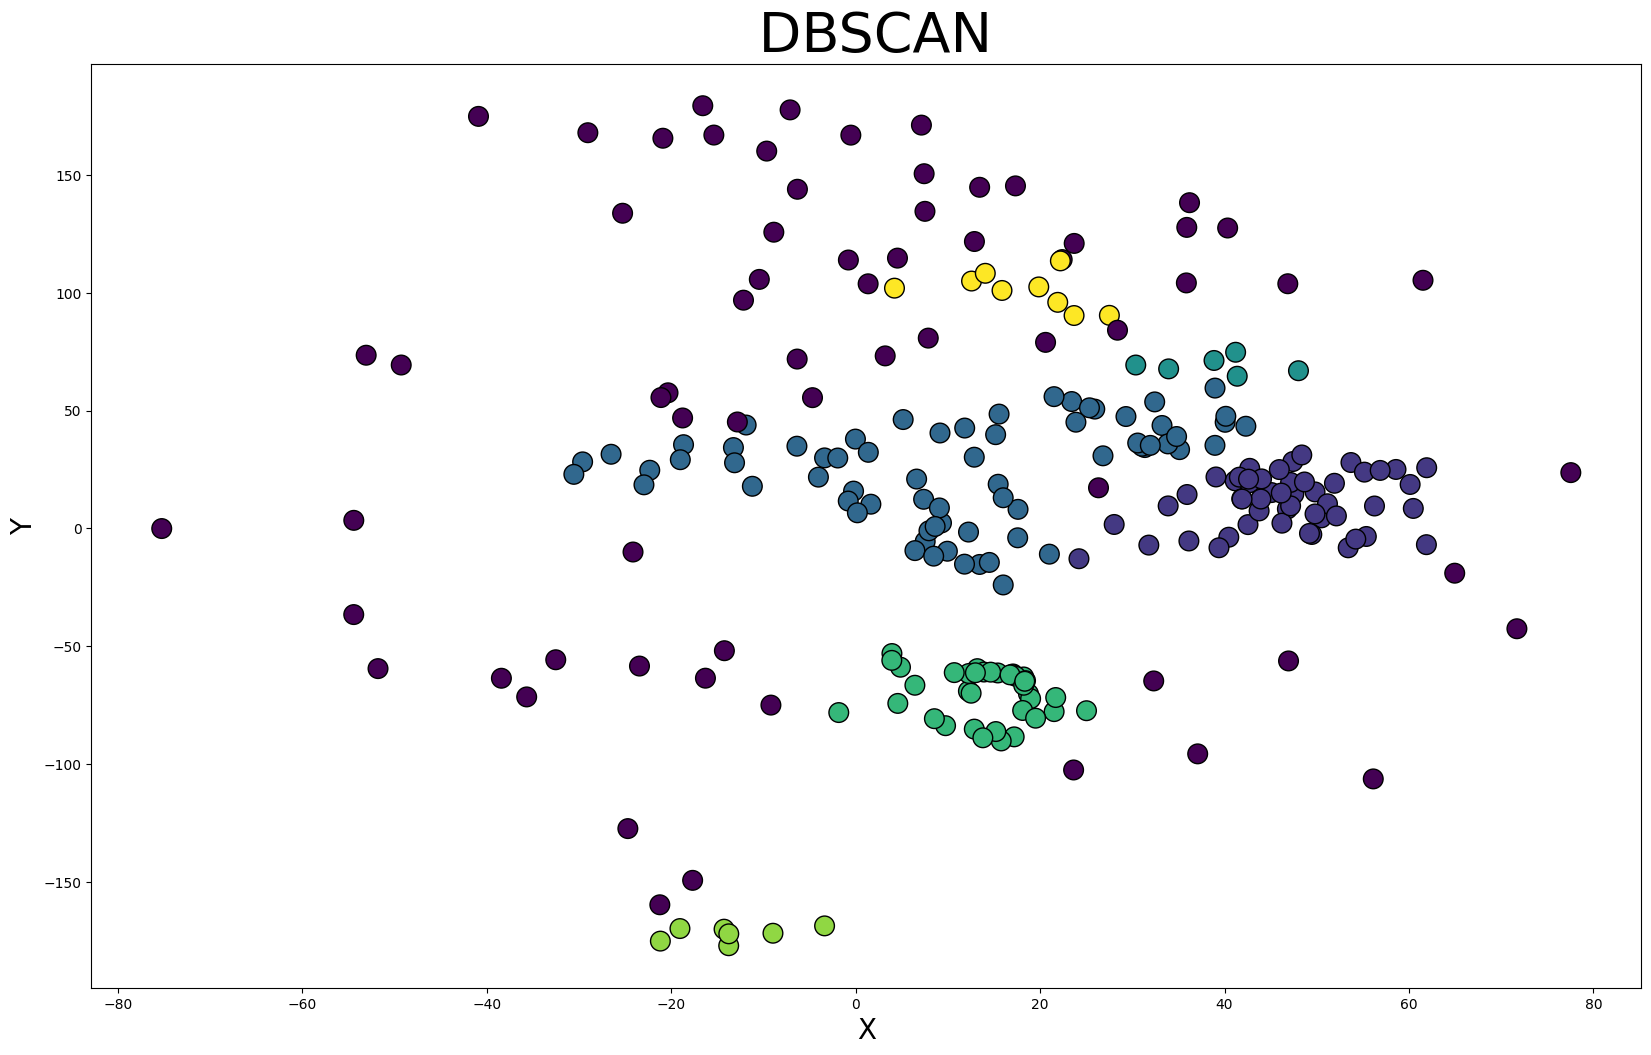

In [359]:
plt.figure(figsize=(20,12))
plt.scatter(
    data['latitude'], data['longitude'],
    c=y_pred_DB, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.title(" DBSCAN", fontsize=40)
plt.show()

### DPC

In [360]:
dpca = DensityPeakCluster(density_threshold=10, distance_threshold= 7, anormal=False)
dpca.fit(data.iloc[:,[1,2]])

In [361]:
rho = dpca.local_density()
delta, nneigh = dpca.min_neighbor_and_distance()
labels, center = dpca.collapse()

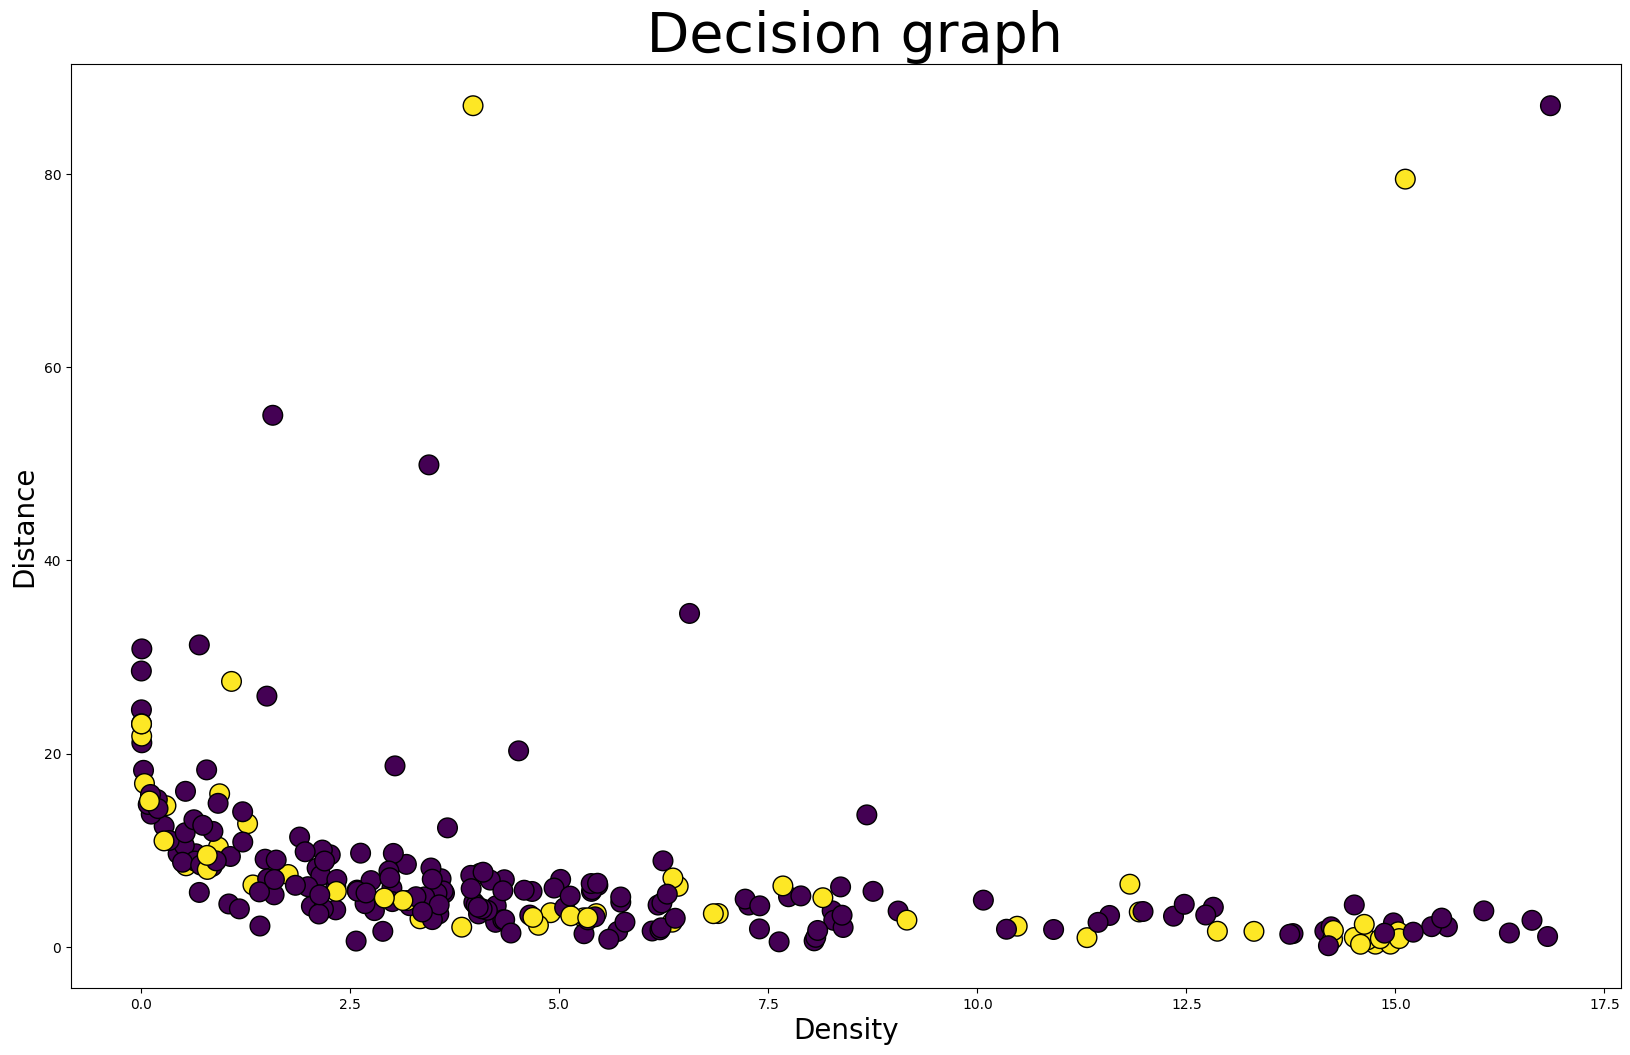

In [362]:
plt.figure(figsize=(20,12))
plt.scatter(
    rho,delta,
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("Density", fontsize=20)
plt.ylabel("Distance", fontsize=20)
plt.title(" Decision graph", fontsize=40)
plt.show()

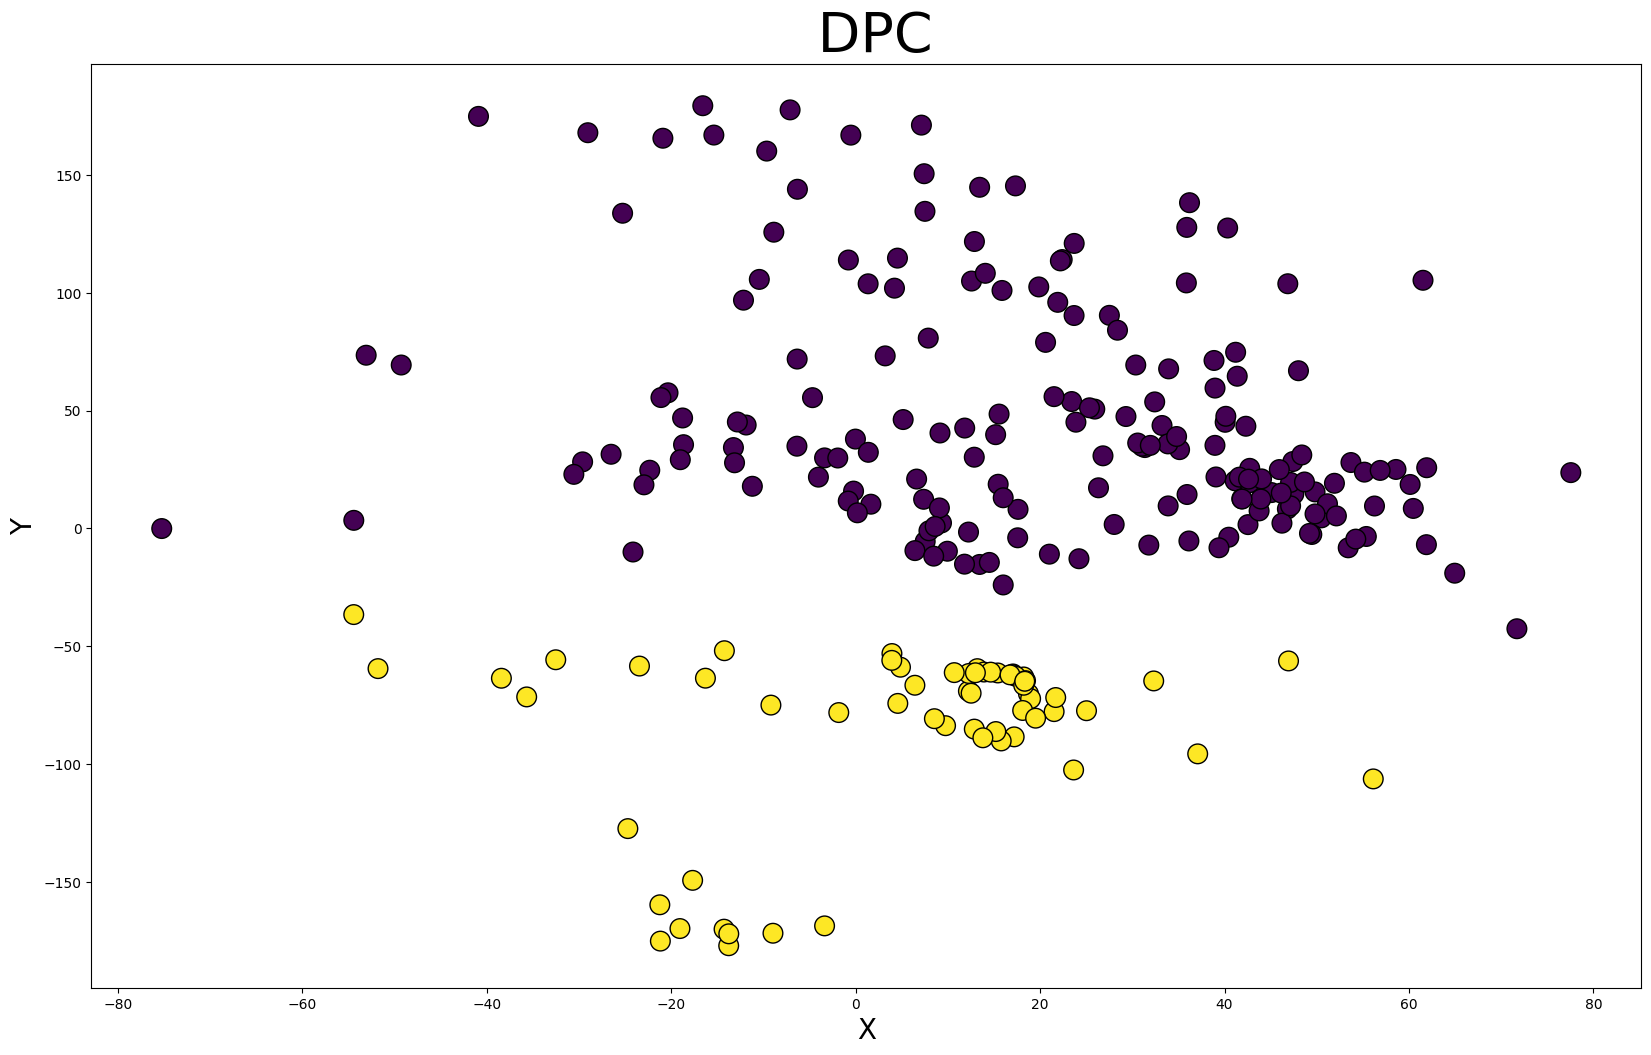

In [363]:
plt.figure(figsize=(20,12))
plt.scatter(
    data['latitude'],data['longitude'],
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title(" DPC", fontsize=40)
plt.show()

# EX3: So sánh kết quả và nhận xét
* trong 3 thuật toán Kmeans ổn nhất nhưng khó bỏ ngoại lai
* DBSCAN khó phân loại
* DPC chia khá ổn nhưng khó